# Regression : bike sharing demand

### evaluation : RSMLE 
- 과대평가된 항목보다는 과소평가된 항목에 패널티를 주는 방식
- 예측값과 실제값의 오차를 제곱해서 평균한 값의 제곱근 , 0에 가까울 수록 정밀도가 높음

### Category
- Dataset / Library
- EDA
- Feature Engineering / Data Cleansing
- Feature Selection
- Modeling
- Evaluation

In [1]:
#rsmle 구현

from sklearn.metrics import make_scorer

def rmsle(predicted_val, actual_val):
    predicted_val = np.array(predicted_val)
    actual_val = np.array(actual_val)
    
    #1더하고 로그를 씌어줌
    log_pred= np.log(predicted_val + 1)
    log_actual=np.log(actual_val + 1)
    
    #두 값의 오차
    diff = log_pred - log_actual
    diff = np.square(diff)
    
    #평균
    diff_mean=np.average(diff)
    
    #제곱근
    score=np.sqrt(diff_mean)
    
    return score

# 1. Load Library / Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# plt 한글 깨짐 방지 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#노트북 안에 그래프 그리기 위해
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 꺠지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

#warning 무시

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('bike-sharing-demand/train.csv', parse_dates=['datetime'])
test = test=pd.read_csv('bike-sharing-demand/test.csv', parse_dates=['datetime'])
sub = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')

# 2. EDA 

In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [9]:
#결측치 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

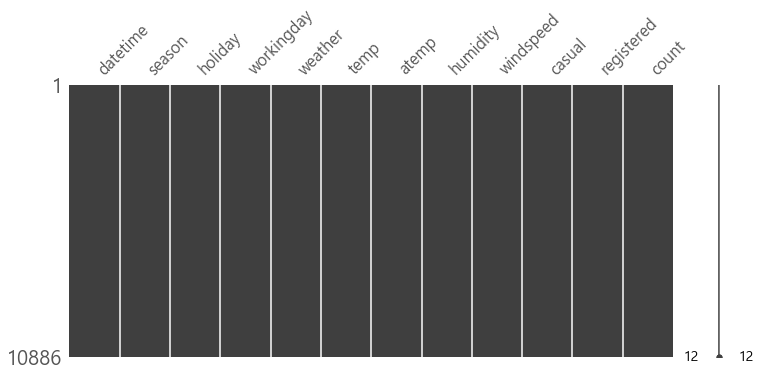

In [10]:
#결측치 확인 시각화
import missingno as msno

msno.matrix(train,figsize=(12,5))

In [11]:
#train

#연/월/일/ 시간/분/초 Feauture생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

#일주일 수치화 
train['dayofweek']=train['datetime'].dt.dayofweek

In [12]:
#test

#연/월/일/ 시간/분/초 Feauture생성
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

#일주일 수치화 
test['dayofweek']=test['datetime'].dt.dayofweek

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

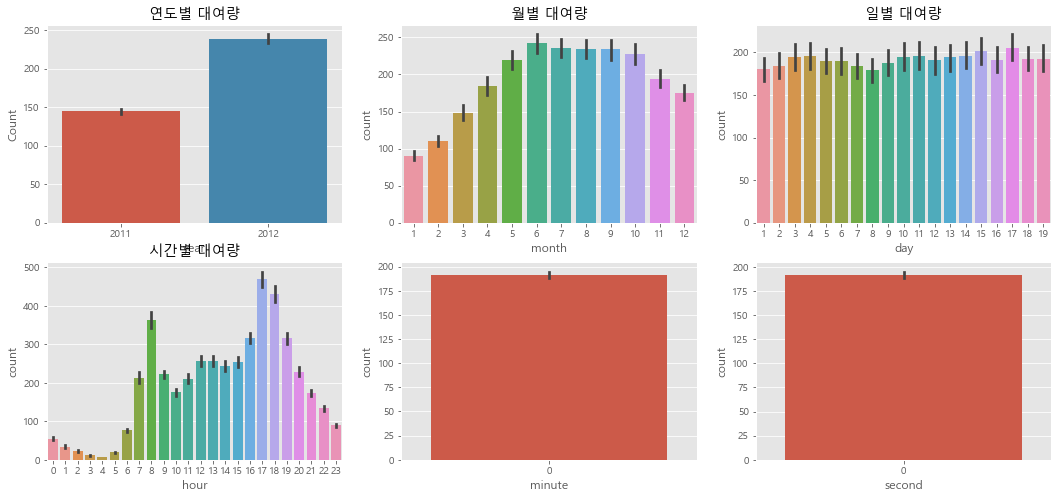

In [13]:
#각 연도별,월별,일별 대여량 => barplot

figure,((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3) #2행3열
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(xlabel='month', title='월별 대여량')
ax3.set(xlabel='day', title='일별 대여량')
ax4.set(xlabel='hour', title='시간별 대여량')

[Text(0.5, 19.199999999999996, 'workingday'), Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

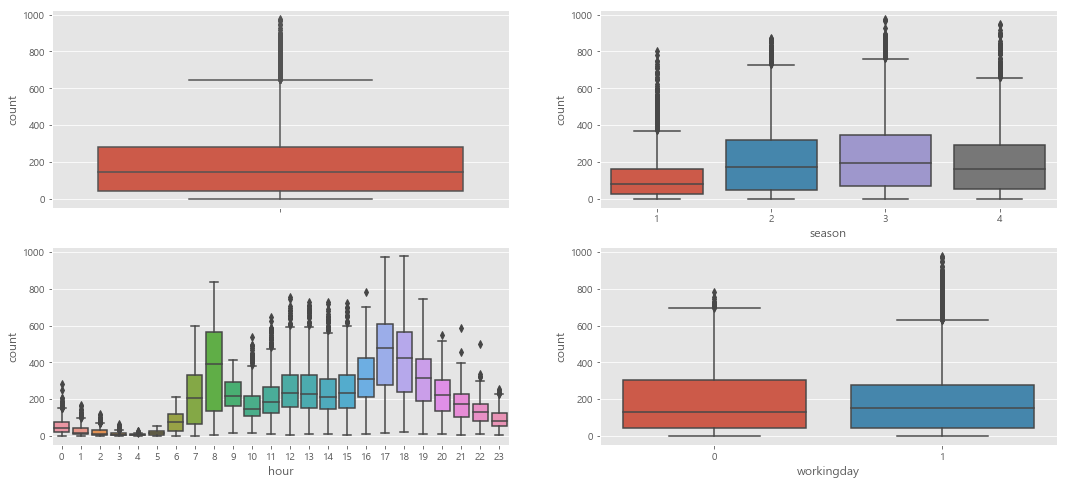

In [14]:
#각 계절별, 워킹데이 대여량 => boxplot

figure,axes = plt.subplots(nrows=2, ncols=2) #2행3열
figure.set_size_inches(18,8)

sns.boxplot(data=train, orient='v', y='count', ax=axes[0][0])
sns.boxplot(data=train, x='season', y='count', ax=axes[0][1])
sns.boxplot(data=train, x='hour', y='count', ax=axes[1][0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[1][1])

ax1.set(ylabel='Count', title=' 대여량')
ax2.set(xlabel='season', title='계절별 대여량')
ax3.set(xlabel='hour', title='시간별 대여량')
ax4.set(xlabel='workingday', title='근무일 여부에 따른 대여량')

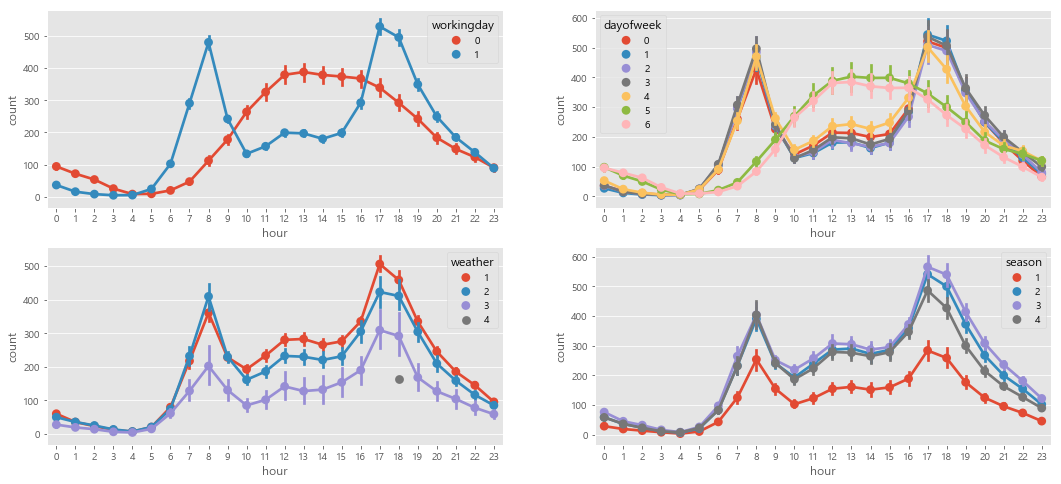

In [15]:
figure,axes = plt.subplots(nrows=2, ncols=2) #2행3열
figure.set_size_inches(18,8)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=axes[0][0])
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=axes[0][1])
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[1][0])
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=axes[1][1])

# ax1.set(ylabel='Count', title=' 대여량')
# ax2.set(xlabel='season', title='계절별 대여량')
# ax3.set(xlabel='hour', title='시간별 대여량')
# ax4.set(xlabel='workingday', title='근무일 여부에 따른 대여량')

### Feature간 상관관계 찾기

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [17]:
com_train=train[['temp','atemp','humidity','windspeed','casual','registered','count']]

In [18]:
com_train=com_train.corr()

mask=np.array(com_train)
mask[np.tril_indices_from(mask)]=False

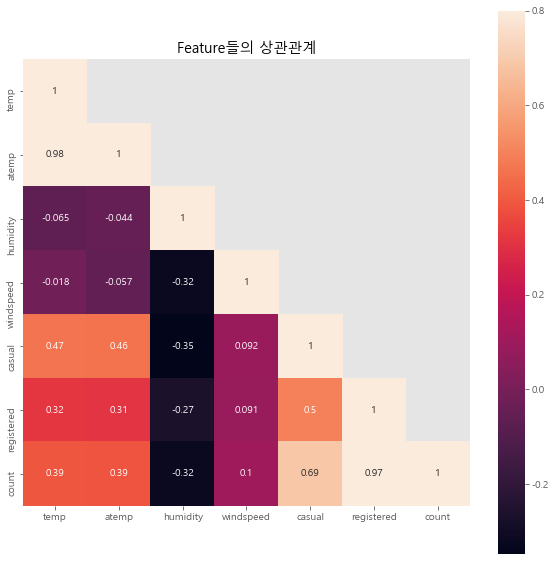

In [19]:
plt.figure(figsize=(10,10))
plt.title('Feature들의 상관관계')
sns.heatmap(com_train, mask=mask, annot =True,  vmax=.8, square=True)

### 결과 
- count와 registered는 상관관계 높음, casual이랑도 높음
- count와 humidity는 음의 상관관계


### 연/월 수요량 

In [20]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
train['year_month']=train['datetime'].apply(concatenate_year_month)

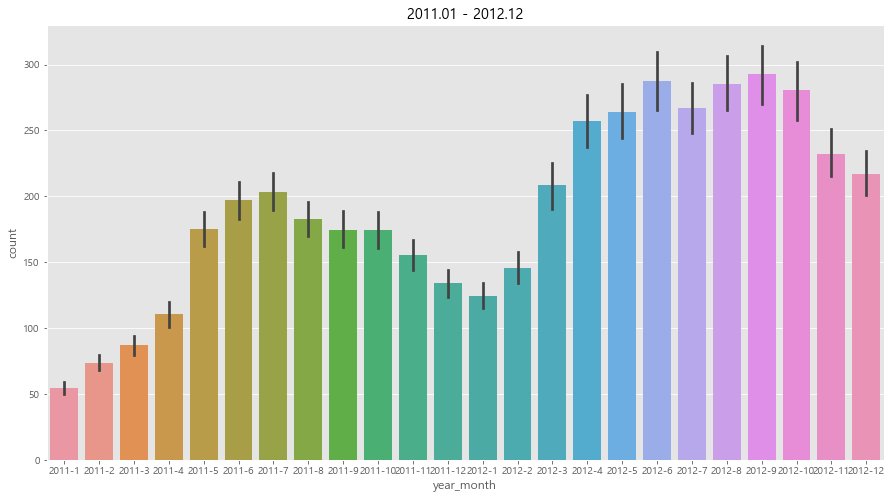

In [21]:
plt.figure(figsize=(15,8))
plt.title('2011.01 - 2012.12')
sns.barplot(data=train, x='year_month', y='count') #증가하는 추세

# 3. Data cleansing  

### 예측을 통한 풍속 0 대체 

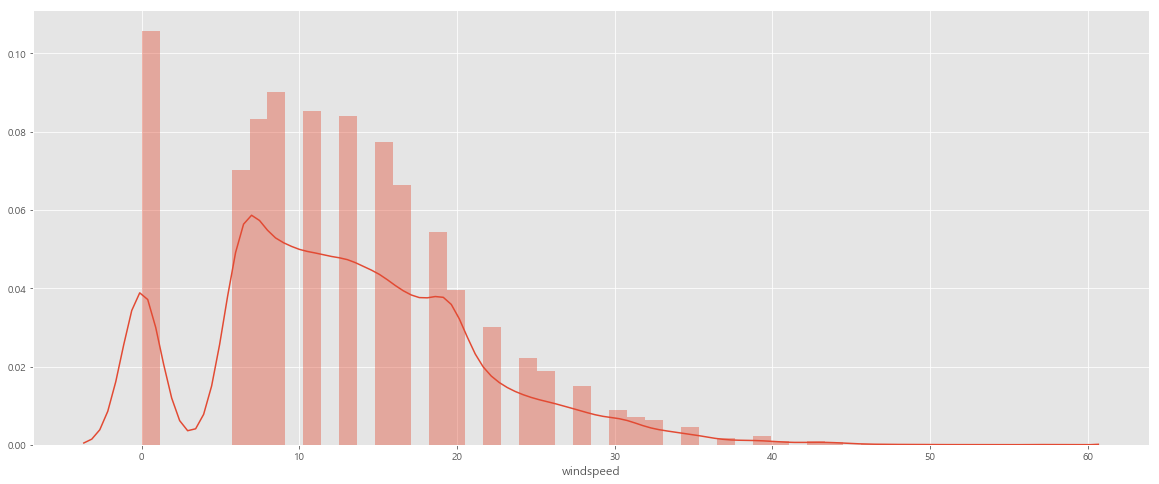

In [22]:
#풍속에 0이 너무 많이 존재
plt.figure(figsize=(20,8))
sns.distplot(train['windspeed'])

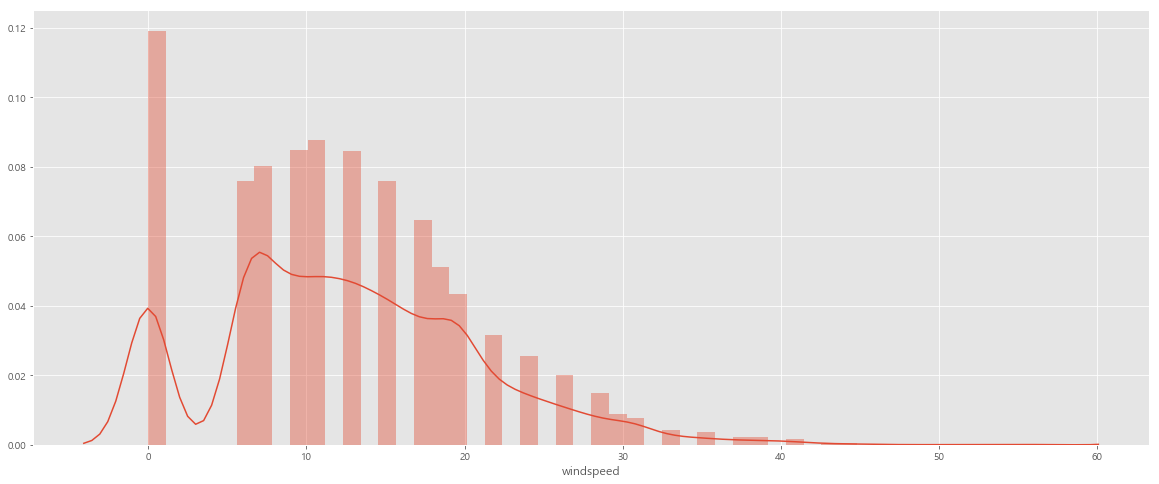

In [23]:
plt.figure(figsize=(20,8))
sns.distplot(test['windspeed'])

In [24]:
#0값을 대체해주기 위한 작업 : 단순히 평균값이 아닌 예측을 해서 넣어줌

#풍속이 0인 것과 아닌것으로 나눔
trainWind0 = train.loc[train['windspeed']==0]
trainWindNot0 = train.loc[train['windspeed']!=0] 

In [25]:
#머신러닝으로 예측을 해서 풍속을 넣어주도록함

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    dataWind0 = data.loc[train['windspeed']==0] #test
    dataWindNot0 = data.loc[train['windspeed']!=0] #train
    
    #풍속을 예측할 피쳐 선택
    wcol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
    
    #풍속이 0이 아닌 테이블의 타입을 스트링으로 변경
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    #랜덤포레스트 분류기 사용
    rf = RandomForestClassifier()
    
    #train 학습
    rf.fit(dataWindNot0[wcol], dataWindNot0['windspeed'])
    
    #test예측
    wind0Values=rf.predict(dataWind0[wcol])
    
    #값을 다 예측후 비교해 보기 위해 예측값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    #값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0['windspeed'] = wind0Values
    
    #datawindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터를 합쳐준다.
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

In [26]:
train = predict_windspeed(train)

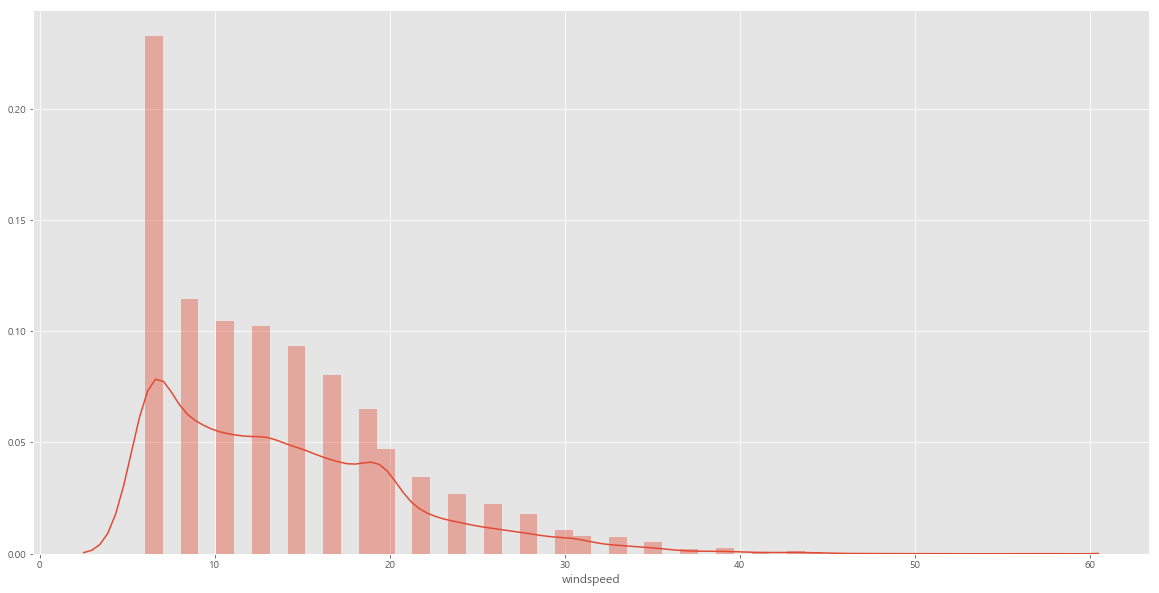

In [27]:
#windspeed값을 0으로 조정한 데이터 시각화

plt.figure(figsize=(20,10))
sns.distplot(train['windspeed'])

## Feature Selection 

- Feature가 많다고 무조건 좋은 성능을 내는 것은 아님
- Feature 를 추가. 제거를 통해 성능을 높임

In [28]:
#연속형 feature들 int -> categorical로 변경
categorical_feature = ['season', 'holiday', 'workingday','weather', 'dayofweek','month', 'year', 'hour']

for var in categorical_feature:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null category
month         10886 non-null category
day           10886 non-null int64
hour          10886 non-null category
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null category
year_month    10886 non-null object
dtypes: category(8), datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 1.1+ MB


In [30]:
#학습할 Feature 뽑기 *train/test동일하게 모두 적용해야함

feature_name = ['season','weather','temp','atemp','humidity','windspeed' ,'holiday', 'workingday', 'dayofweek','month', 'year', 'hour']

In [31]:
Xtrain=train[feature_name]
Xtrain.head()

,season,weather,temp,atemp,humidity,windspeed,holiday,workingday,dayofweek,month,year,hour
0,1,2,9.84,12.880,75,6.0032,0,0,5,1,2011,5
1,1,1,15.58,19.695,76,16.9979,0,0,5,1,2011,10
2,1,1,14.76,16.665,81,19.0012,0,0,5,1,2011,11
3,1,1,17.22,21.210,77,19.0012,0,0,5,1,2011,12
4,1,2,18.86,22.725,72,19.9995,0,0,5,1,2011,13


In [32]:
Xtest=test[feature_name]
Xtest.head()

,season,weather,temp,atemp,humidity,windspeed,holiday,workingday,dayofweek,month,year,hour
0,1,1,10.66,11.365,56,26.0027,0,1,3,1,2011,0
1,1,1,10.66,13.635,56,0.0000,0,1,3,1,2011,1
2,1,1,10.66,13.635,56,0.0000,0,1,3,1,2011,2
3,1,1,10.66,12.880,56,11.0014,0,1,3,1,2011,3
4,1,1,10.66,12.880,56,11.0014,0,1,3,1,2011,4


In [33]:
Ytrain=train['count']

# Modeling : RandomForest 

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
max_depth = []
#모델생성
model = RandomForestRegressor(n_estimators=500, n_jobs=1, random_state=777)

In [48]:
model.fit(Xtrain, Ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                      oob_score=False, random_state=777, verbose=0,
                      warm_start=False)

In [49]:
#예측
pred = model.predict(Xtest)
pred

array([ 11.27 ,   5.31 ,   3.942, ..., 148.846, 114.348,  63.814])

In [38]:
sub['count']=pred
sub.to_csv('submission_bike_sharing3.csv', index=False) 

# Evaluation 

## K-fold validation 

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [40]:
#10fold로 진행
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## rmsle 

In [50]:
rmsle_scorer = make_scorer(rmsle) # 맨 위에서 만든 rmsle함수로 make_scorer 적용

In [51]:
%time score = cross_val_score(model, Xtrain, Ytrain, cv = k_fold, scoring=rmsle_scorer)
score = score.mean()

Wall time: 2min 44s


In [52]:
print("score: {0:.5f}".format(score))

score: 0.32189


### 추가) 범주화 Feature들 encoding 방법
- astype(‘category’).cat.codes

- labelenconder // from sklearn.preprocessing import LabelEncoder

- onehotencoding

In [44]:
#astype('category').cat.codes

#train['Sex'].astype('category').cat.codes

In [45]:
#labelencoder

# 라벨 인코더 생성
# encoder = LabelEncoder()

#  X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
# X_train_encoded = encoder.fit_transform(X_train)


# encoder.classes_ 

# encoder.inverse_transform(X_train_encoded)

# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
# for label in np.unique(X_test):
#     if label not in encoder.classes_: # unseen label 데이터인 경우( )
#         encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
# X_test_encoded = encoder.transform(X_test)

In [46]:
#onehotencoding

#pd.get_dummies(train['Sex'])